# Brief Introduction to `caret` Classifiers

*Xin Xie*

Let's take a look at how we can use `caret` classifiers in R to make predictions. We first load the `iris` dataset using `data` function.

In [1]:
data(iris)
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


The `iris` data in R includes continuous variables `Sepal.Length`, `Sepal.Width`, `Petal.Length`, and `Petal.Width` and target variable `Species` with the categories 'setosa', 'versicolor', and 'virginica'. We may first simply plot Petal.Length versus Sepal.Length to see how the data look like. Obviously, some boundaries exsit to classify the Species.

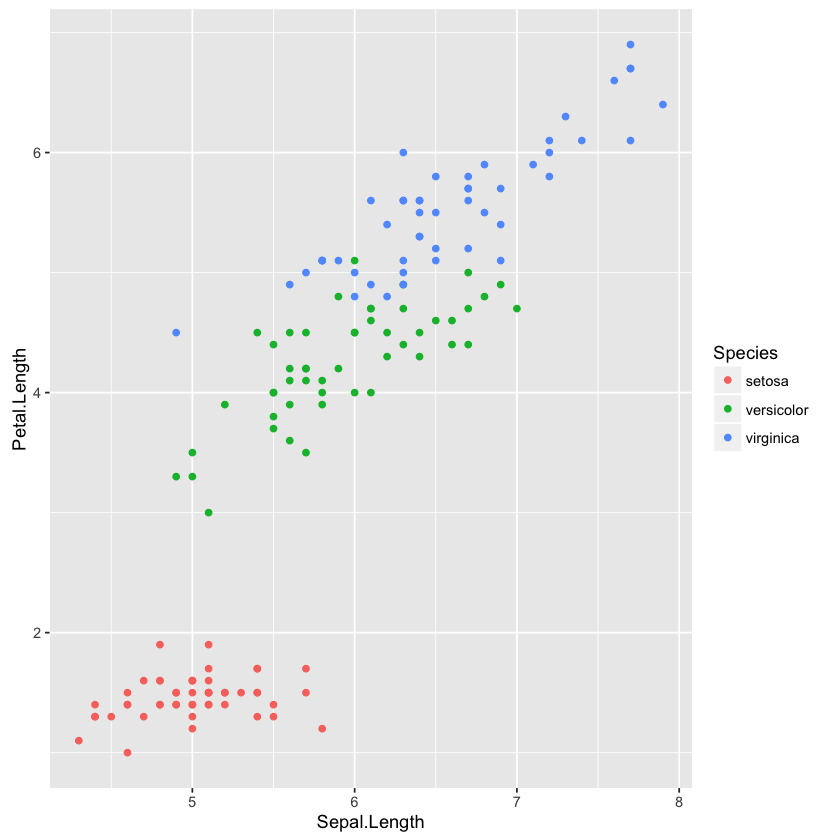

In [13]:
library(ggplot2)

ggplot(data=iris)+geom_point( aes(x=Sepal.Length, y=Petal.Length, color=Species) )

# Data Preprocessing
There are no missing values in the dataset so we don't need data cleaning work. Before the modeling work, we need to split the data into training and test dataset. Don't forget to load the `caret` library.

In [82]:
library(caret)

trainind = createDataPartition( iris$Species, p=0.67, list=F)
train = iris[trainind,]
test  = iris[-trainind,]
str(train)
str(test)

output = function(clf, xtrain, ytrain, xtest, ytest) {
    htrain = predict(clf, xtrain)
    htest = predict(clf, xtest)
    print( paste('Train Score:', sum(htrain==ytrain)/length(ytrain), ' Test Score:', sum(htest==ytest)/length(ytest)) )
    print( table( htrain, ytrain) )
    print( table( htest, ytest) )
}

'data.frame':	102 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 5 5.4 4.6 5 4.4 5.4 4.8 ...
 $ Sepal.Width : num  3.5 3 3.2 3.6 3.9 3.4 3.4 2.9 3.7 3.4 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.4 1.7 1.4 1.5 1.4 1.5 1.6 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.2 0.2 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	48 obs. of  5 variables:
 $ Sepal.Length: num  4.6 4.9 4.3 5.4 5.1 5.2 4.7 4.8 5.4 4.9 ...
 $ Sepal.Width : num  3.1 3.1 3 3.4 3.7 3.5 3.2 3.1 3.4 3.1 ...
 $ Petal.Length: num  1.5 1.5 1.1 1.7 1.5 1.5 1.6 1.6 1.5 1.5 ...
 $ Petal.Width : num  0.2 0.1 0.1 0.2 0.4 0.2 0.2 0.2 0.4 0.2 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


# Modeling
Let's try some classifiers in R. In `caret`, we use `train` function to train classifier. There are two ways you may specify inputs for `train` function. The traditional way is to specify formula and data frame `train(formula, data=, method=)` so that it will automatically train the given model for the specified variable relationship in formula. In this way, input and target data are in the same data frame. Here we first try the decision tree model `rpart`.

In [69]:
clf = train( Species ~ ., data=train, method='rpart' )

Another way is similar to the Python way, specifying data and target separately with `train(x=, y=, method=)`. In this way, we may have to separate the input and target ourself. Note that `y` should be vector rather than data frame here.

In [70]:
xtrain = train[ c('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width') ]
ytrain = train$Species
xtest = test[ c('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width') ]
ytest = test$Species

In [83]:
clf = train( x=xtrain, y=ytrain, method='rpart' )
output( clf, xtrain, ytrain, xtest, ytest)

[1] "Train Score: 0.970588235294118  Test Score: 0.916666666666667"
            ytrain
htrain       setosa versicolor virginica
  setosa         34          0         0
  versicolor      0         33         2
  virginica       0          1        32
            ytest
htest        setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         13         1
  virginica       0          3        15


The decision tree model does a little bit worse the Python `scikit-learn` implementation, which gets 0.96 accuracy. Let's try other models.

## LDA

In [91]:
clf = train( x=xtrain, y=ytrain, method='lda' )
output( clf, xtrain, ytrain, xtest, ytest)

[1] "Train Score: 0.990196078431373  Test Score: 0.979166666666667"
            ytrain
htrain       setosa versicolor virginica
  setosa         34          0         0
  versicolor      0         33         0
  virginica       0          1        34
            ytest
htest        setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         15         0
  virginica       0          1        16


## Naive Bayes

In [92]:
clf = train( x=xtrain, y=ytrain, method='nb' )
output( clf, xtrain, ytrain, xtest, ytest)

Warning message:
In FUN(X[[i]], ...): Numerical 0 probability for all classes with observation 15

[1] "Train Score: 0.970588235294118  Test Score: 0.958333333333333"
            ytrain
htrain       setosa versicolor virginica
  setosa         34          0         0
  versicolor      0         33         2
  virginica       0          1        32
            ytest
htest        setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         14         0
  virginica       0          2        16


## Random Forest

In [86]:
clf = train( x=xtrain, y=ytrain, method='rf' )
output( clf, xtrain, ytrain, xtest, ytest)

[1] "Train Score: 1  Test Score: 0.958333333333333"
            ytrain
htrain       setosa versicolor virginica
  setosa         34          0         0
  versicolor      0         34         0
  virginica       0          0        34
            ytest
htest        setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         14         0
  virginica       0          2        16


The random forest model does slightly better job than decision tree.

## Bagging

In [73]:
clf = train( x=xtrain, y=ytrain, method='rf' )
output( clf, xtrain, ytrain, xtest, ytest)

[1] "Train Score: 1  Test Score: 0.958333333333333"


## Gradient Boosting Model

In [87]:
clf = train( x=xtrain, y=ytrain, method='gbm', verbose=F )
output( clf, xtrain, ytrain, xtest, ytest)

[1] "Train Score: 1  Test Score: 0.9375"
            ytrain
htrain       setosa versicolor virginica
  setosa         34          0         0
  versicolor      0         34         0
  virginica       0          0        34
            ytest
htest        setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         13         0
  virginica       0          3        16
